# Fraud Anomaly Detection with Isolation Forest
This notebook demonstrates how to use the Isolation Forest algorithm to detect fraudulent transactions in a credit card dataset. We'll use the Kaggle Credit Card Fraud Detection dataset, which contains transaction features and a fraud label.

## 1. Import Libraries and Load Dataset
We'll start by importing the necessary Python libraries and loading the Kaggle Credit Card Fraud Detection dataset. If you don't have the dataset, download it from Kaggle: https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud

In [2]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
 
# Load the dataset (update the path if needed)
df = pd.read_csv('creditcard.csv')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


## 2. Data Preprocessing
We'll preprocess the data by scaling features and selecting relevant columns. The dataset is already cleaned, but we'll standardize the 'Amount' and 'Time' columns for better model performance.

In [3]:
# Scale 'Amount' and 'Time' columns
scaler = StandardScaler()
df['Amount_scaled'] = scaler.fit_transform(df[['Amount']])
df['Time_scaled'] = scaler.fit_transform(df[['Time']])
 
# Select features for Isolation Forest
features = ['Time_scaled', 'Amount_scaled'] + [col for col in df.columns if col.startswith('V')]
X = df[features]
y = df['Class']  # 1 = Fraud, 0 = Normal
 
print(f"Number of transactions: {len(df)}")
print(f"Number of frauds: {df['Class'].sum()}")

Number of transactions: 284807
Number of frauds: 492


## 3. Train Isolation Forest Model
We'll train an Isolation Forest model to learn patterns of normal and anomalous transactions. Isolation Forest is well-suited for anomaly detection in high-dimensional datasets.

In [4]:
# Train Isolation Forest model
isoforest = IsolationForest(n_estimators=100, contamination=float(df['Class'].sum())/len(df), random_state=42)
isoforest.fit(X)

,n_estimators,100
,max_samples,'auto'
,contamination,0.001727485630620034
,max_features,1.0
,bootstrap,False
,n_jobs,None
,random_state,42
,verbose,0
,warm_start,False


## 4. Predict Anomalies
We'll use the trained Isolation Forest to predict anomalies. The model assigns -1 to anomalies (potential frauds) and 1 to normal transactions.

In [5]:
# Predict anomalies
y_pred = isoforest.predict(X)
# Convert predictions: -1 = anomaly (fraud), 1 = normal
y_pred = np.where(y_pred == -1, 1, 0)
 
# Add predictions to DataFrame for visualization
df['Anomaly_Pred'] = y_pred
print(pd.value_counts(y_pred))

0    284315
1       492
Name: count, dtype: int64


/var/folders/_0/y84_kvr94qn118s0909pkzlc0000gn/T/ipykernel_6586/588460801.py:8: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  print(pd.value_counts(y_pred))


## 5. Evaluate Model Performance
Let's evaluate the Isolation Forest's predictions using confusion matrix and classification metrics (precision, recall, F1-score).

Confusion Matrix:
[[283967    348]
 [   348    144]]
Classification Report:
              precision    recall  f1-score   support

           0     0.9988    0.9988    0.9988    284315
           1     0.2927    0.2927    0.2927       492

    accuracy                         0.9976    284807
   macro avg     0.6457    0.6457    0.6457    284807
weighted avg     0.9976    0.9976    0.9976    284807



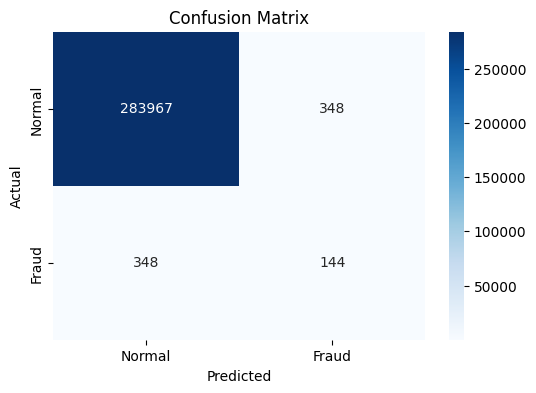

In [6]:
# Confusion matrix and classification report
cm = confusion_matrix(y, y_pred)
print("Confusion Matrix:")
print(cm)
 
print("Classification Report:")
print(classification_report(y, y_pred, digits=4))
 
# Visualize confusion matrix
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Normal','Fraud'], yticklabels=['Normal','Fraud'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

## 6. Visualize Anomaly Detection Results
Let's visualize the results using a scatter plot. We'll plot transaction amount vs. time, coloring anomalies (fraud) as red dots and normal transactions as blue.

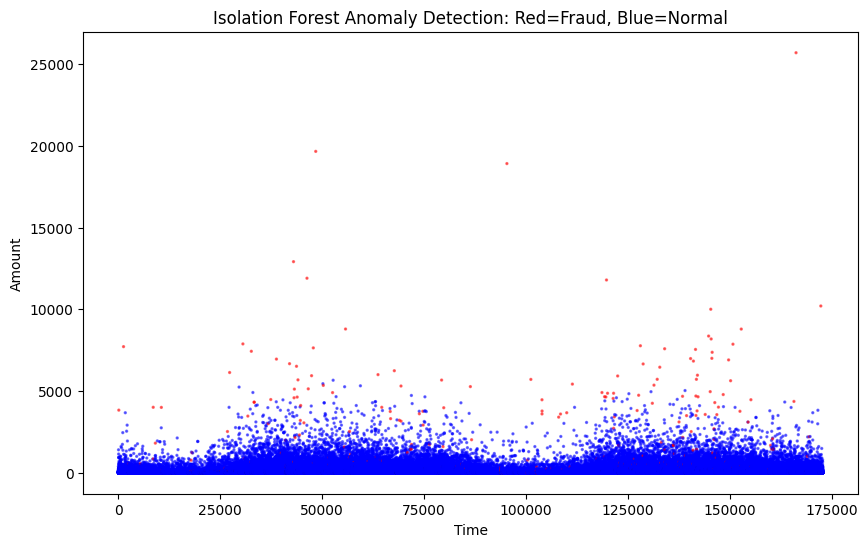

In [7]:
# Scatter plot of transactions: Amount vs Time, colored by anomaly prediction
plt.figure(figsize=(10,6))
colors = np.where(df['Anomaly_Pred']==1, 'red', 'blue')
plt.scatter(df['Time'], df['Amount'], c=colors, alpha=0.5, s=2)
plt.xlabel('Time')
plt.ylabel('Amount')
plt.title('Isolation Forest Anomaly Detection: Red=Fraud, Blue=Normal')
plt.show()